# Imports

In [1]:
# generic data science libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import scikit-learn
from sklearn.model_selection import train_test_split

# models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Gather Data

In [2]:
df = pd.read_csv("life_expectancy_data_combined.csv")
df.head()

,location,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling,region,incomeGroup
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,South Asia,Low income
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,South Asia,Low income
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,South Asia,Low income
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,South Asia,Low income
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,South Asia,Low income


# Explore the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   location                      2938 non-null   object 
 1   Year                          2938 non-null   int64  
 2   Status                        2938 non-null   object 
 3   Lifeexpectancy                2928 non-null   float64
 4   AdultMortality                2928 non-null   float64
 5   infantdeaths                  2938 non-null   int64  
 6   Alcohol                       2744 non-null   float64
 7   percentageexpenditure         2938 non-null   float64
 8   HepatitisB                    2385 non-null   float64
 9   Measles                       2938 non-null   int64  
 10  BMI                           2904 non-null   float64
 11  under-fivedeaths              2938 non-null   int64  
 12  Polio                         2919 non-null   float64
 13  Tot

In [4]:
df.describe()

,Year,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [5]:
df.incomeGroup.unique()

array(['Low income', 'Upper middle income', 'Lower middle income',
       'High income', nan], dtype=object)

In [6]:
df.region.unique()

array(['South Asia', 'Europe & Central Asia',
       'Middle East & North Africa', 'Sub-Saharan Africa',
       'Latin America & Caribbean', 'East Asia & Pacific',
       'North America', nan], dtype=object)

In [7]:
df.Status.unique()

array(['Developing', 'Developed'], dtype=object)

In [8]:
df.groupby("incomeGroup").size()

incomeGroup
High income            869
Low income             448
Lower middle income    768
Upper middle income    819
dtype: int64

In [9]:
df.groupby("region").size()

region
East Asia & Pacific           404
Europe & Central Asia         754
Latin America & Caribbean     498
Middle East & North Africa    320
North America                  32
South Asia                    128
Sub-Saharan Africa            768
dtype: int64

In [10]:
df.groupby("Status").size()

Status
Developed      512
Developing    2426
dtype: int64

# Clean the Data

In [11]:
# df["Status"] = [0 if x == "Developed" else 1 for x in df.Status]

# df_sub = df.loc[:,:]

df_sub = df.loc[:, ["Lifeexpectancy", "Alcohol", "percentageexpenditure", "Measles", "BMI", "HIV/AIDS", "Schooling", "incomeGroup"]]

df_sub.head()

,Lifeexpectancy,Alcohol,percentageexpenditure,Measles,BMI,HIV/AIDS,Schooling,incomeGroup
0,65.0,0.01,71.279624,1154,19.1,0.1,10.1,Low income
1,59.9,0.01,73.523582,492,18.6,0.1,10.0,Low income
2,59.9,0.01,73.219243,430,18.1,0.1,9.9,Low income
3,59.5,0.01,78.184215,2787,17.6,0.1,9.8,Low income
4,59.2,0.01,7.097109,3013,17.2,0.1,9.5,Low income


In [12]:
# Fill NA
# df_sub["Age"] = df_sub.Age.fillna(df_sub.Age.mean())
# df_sub["Embarked"] = df_sub.Embarked.fillna("S")
df_sub = df_sub.dropna()

df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2569 entries, 0 to 2937
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Lifeexpectancy         2569 non-null   float64
 1   Alcohol                2569 non-null   float64
 2   percentageexpenditure  2569 non-null   float64
 3   Measles                2569 non-null   int64  
 4   BMI                    2569 non-null   float64
 5   HIV/AIDS               2569 non-null   float64
 6   Schooling              2569 non-null   float64
 7   incomeGroup            2569 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 180.6+ KB


In [13]:
# get dums
dums_linear = pd.get_dummies(df_sub.loc[:, ["incomeGroup"]], drop_first=True)
dums_other = pd.get_dummies(df_sub.loc[:, ["incomeGroup"]], drop_first=False)

#concat
df_sub_linear = pd.concat([df_sub, dums_linear], axis=1)
df_sub_other = pd.concat([df_sub, dums_other], axis=1)

#drop original
df_sub_linear = df_sub_linear.drop(["incomeGroup"], axis=1)
df_sub_other = df_sub_other.drop(["incomeGroup"], axis=1)

df_sub_other.head()

,Lifeexpectancy,Alcohol,percentageexpenditure,Measles,BMI,HIV/AIDS,Schooling,incomeGroup_High income,incomeGroup_Low income,incomeGroup_Lower middle income,incomeGroup_Upper middle income
0,65.0,0.01,71.279624,1154,19.1,0.1,10.1,0,1,0,0
1,59.9,0.01,73.523582,492,18.6,0.1,10.0,0,1,0,0
2,59.9,0.01,73.219243,430,18.1,0.1,9.9,0,1,0,0
3,59.5,0.01,78.184215,2787,17.6,0.1,9.8,0,1,0,0
4,59.2,0.01,7.097109,3013,17.2,0.1,9.5,0,1,0,0


# Look at Corrleations

In [14]:
df_sub_other.corr()

,Lifeexpectancy,Alcohol,percentageexpenditure,Measles,BMI,HIV/AIDS,Schooling,incomeGroup_High income,incomeGroup_Low income,incomeGroup_Lower middle income,incomeGroup_Upper middle income
Lifeexpectancy,1.000000,0.379419,0.412648,-0.146717,0.566617,-0.571140,0.745861,0.597870,-0.531653,-0.325906,0.124802
Alcohol,0.379419,1.000000,0.364969,-0.032202,0.325384,-0.039742,0.546200,0.517925,-0.258547,-0.364535,0.034267
percentageexpenditure,0.412648,0.364969,1.000000,-0.058593,0.249950,-0.106417,0.415809,0.493405,-0.156266,-0.215176,-0.163825
Measles,-0.146717,-0.032202,-0.058593,1.000000,-0.170201,0.032133,-0.149340,-0.112450,0.040049,0.084645,-0.000544
BMI,0.566617,0.325384,0.249950,-0.170201,1.000000,-0.243511,0.557419,0.379005,-0.370976,-0.291836,0.187531
HIV/AIDS,-0.571140,-0.039742,-0.106417,0.032133,-0.243511,1.000000,-0.224827,-0.205825,0.143193,0.142605,-0.042163
Schooling,0.745861,0.546200,0.415809,-0.149340,0.557419,-0.224827,1.000000,0.591224,-0.499041,-0.324714,0.105478
incomeGroup_High income,0.597870,0.517925,0.493405,-0.112450,0.379005,-0.205825,0.591224,1.000000,-0.260372,-0.390212,-0.419326
incomeGroup_Low income,-0.531653,-0.258547,-0.156266,0.040049,-0.370976,0.143193,-0.499041,-0.260372,1.000000,-0.245028,-0.263309
incomeGroup_Lower middle income,-0.325906,-0.364535,-0.215176,0.084645,-0.291836,0.142605,-0.324714,-0.390212,-0.245028,1.000000,-0.394615


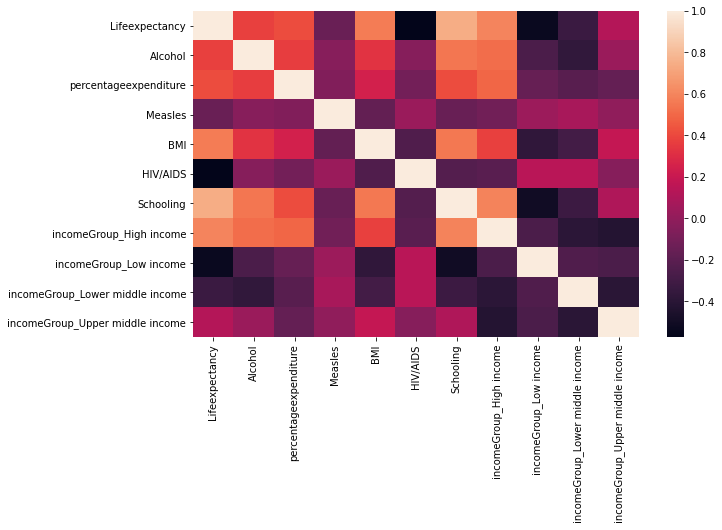

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df_sub_other.corr())
plt.show()

# Machine Learning

## Linear Models

In [16]:
# get pandas columns for prediction
target = df_sub_linear["Lifeexpectancy"]
features = df_sub_linear.drop(["Lifeexpectancy"], axis=1)

# convert to lists/arrays (MUST HAPPEN)
X = np.array(features)
y = np.array(target)

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Regression
In-Sample R2:  0.8158686313290613
Out-Sample R2:  0.8080015569532519

In-Sample MSE:  16.160619869426302
Out-Sample MSE:  17.224049754631615

In-Sample MAE:  3.028526480498177
Out-Sample MAE:  3.214359234435772


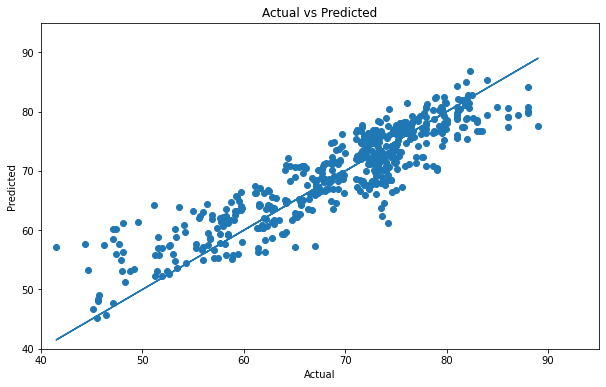

In [17]:
# train the model
reg = LinearRegression()
reg.fit(X_train, y_train)

#get predictions
in_sample_preds = reg.predict(X_train)
out_sample_preds = reg.predict(X_test)

#metric report
print("Linear Regression")
print("In-Sample R2: ", r2_score(y_train, in_sample_preds))
print("Out-Sample R2: ", r2_score(y_test, out_sample_preds))
print()
print("In-Sample MSE: ", mean_squared_error(y_train, in_sample_preds))
print("Out-Sample MSE: ", mean_squared_error(y_test, out_sample_preds))
print()
print("In-Sample MAE: ", mean_absolute_error(y_train, in_sample_preds))
print("Out-Sample MAE: ", mean_absolute_error(y_test, out_sample_preds))

# predicted vs actual
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_sample_preds)
plt.plot(y_test, y_test)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.xlim(40,95)
plt.ylim(40,95)

plt.show()

## Other Models

In [18]:
# get pandas columns for prediction
target = df_sub_other["Lifeexpectancy"]
features = df_sub_other.drop(["Lifeexpectancy"], axis=1)

# convert to lists/arrays (MUST HAPPEN)
X = np.array(features)
y = np.array(target)

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest
In-Sample R2:  0.9898947127805423
Out-Sample R2:  0.9386113500492973

In-Sample MSE:  0.8869086598540163
Out-Sample MSE:  5.507134038910509

In-Sample MAE:  0.6289255474452581
Out-Sample MAE:  1.6598132295719863


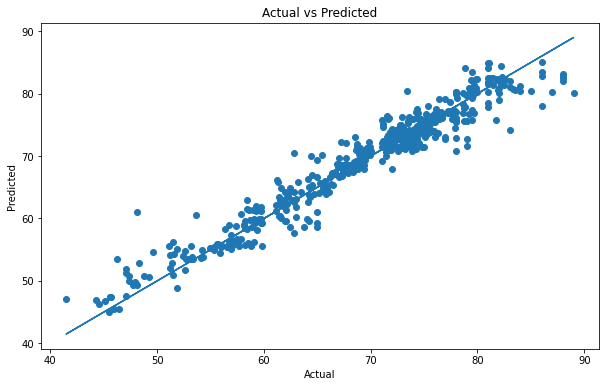

In [20]:
# train the model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

#get predictions
in_sample_preds = rf.predict(X_train)
out_sample_preds = rf.predict(X_test)

#metric report
print("Random Forest")
print("In-Sample R2: ", r2_score(y_train, in_sample_preds))
print("Out-Sample R2: ", r2_score(y_test, out_sample_preds))
print()
print("In-Sample MSE: ", mean_squared_error(y_train, in_sample_preds))
print("Out-Sample MSE: ", mean_squared_error(y_test, out_sample_preds))
print()
print("In-Sample MAE: ", mean_absolute_error(y_train, in_sample_preds))
print("Out-Sample MAE: ", mean_absolute_error(y_test, out_sample_preds))

# predicted vs actual
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_sample_preds)
plt.plot(y_test, y_test)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

plt.show()

Ridge Regression
In-Sample R2:  0.8158663993646579
Out-Sample R2:  0.807998076783822

In-Sample MSE:  16.16081576178591
Out-Sample MSE:  17.224361958264442

In-Sample MAE:  3.028330332612102
Out-Sample MAE:  3.213514966811549


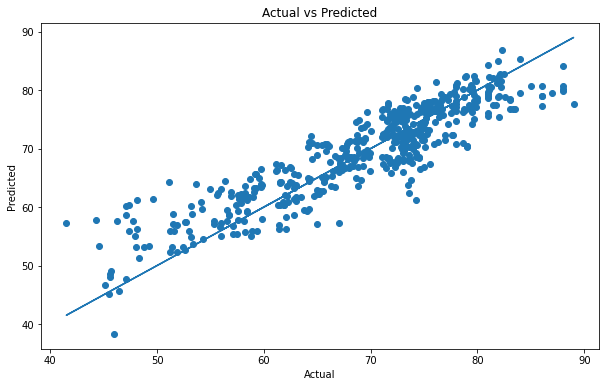

In [21]:
# train the model
ridge = Ridge()
ridge.fit(X_train, y_train)

#get predictions
in_sample_preds = ridge.predict(X_train)
out_sample_preds = ridge.predict(X_test)

#metric report
print("Ridge Regression")
print("In-Sample R2: ", r2_score(y_train, in_sample_preds))
print("Out-Sample R2: ", r2_score(y_test, out_sample_preds))
print()
print("In-Sample MSE: ", mean_squared_error(y_train, in_sample_preds))
print("Out-Sample MSE: ", mean_squared_error(y_test, out_sample_preds))
print()
print("In-Sample MAE: ", mean_absolute_error(y_train, in_sample_preds))
print("Out-Sample MAE: ", mean_absolute_error(y_test, out_sample_preds))

# predicted vs actual
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_sample_preds)
plt.plot(y_test, y_test)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

plt.show()

Lasso Regression
In-Sample R2:  0.7550858860561277
Out-Sample R2:  0.7375787516959353

In-Sample MSE:  21.495326541440967
Out-Sample MSE:  23.541631722301116

In-Sample MAE:  3.529643759465134
Out-Sample MAE:  3.6398981584372523


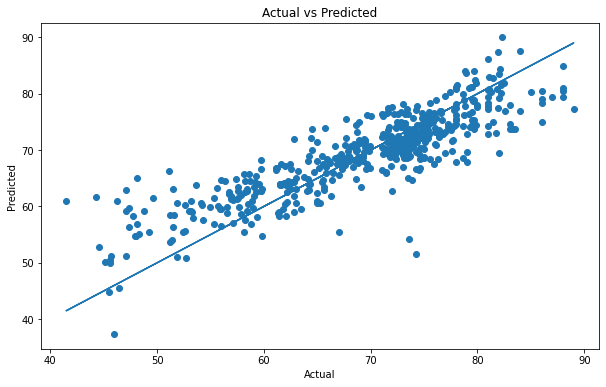

In [22]:
# train the model
lasso = Lasso()
lasso.fit(X_train, y_train)

#get predictions
in_sample_preds = lasso.predict(X_train)
out_sample_preds = lasso.predict(X_test)

#metric report
print("Lasso Regression")
print("In-Sample R2: ", r2_score(y_train, in_sample_preds))
print("Out-Sample R2: ", r2_score(y_test, out_sample_preds))
print()
print("In-Sample MSE: ", mean_squared_error(y_train, in_sample_preds))
print("Out-Sample MSE: ", mean_squared_error(y_test, out_sample_preds))
print()
print("In-Sample MAE: ", mean_absolute_error(y_train, in_sample_preds))
print("Out-Sample MAE: ", mean_absolute_error(y_test, out_sample_preds))

# predicted vs actual
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_sample_preds)
plt.plot(y_test, y_test)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

plt.show()

ElasticNet Regression
In-Sample R2:  0.7545882152282606
Out-Sample R2:  0.7373324331734936

In-Sample MSE:  21.53900551437923
Out-Sample MSE:  23.56372878943718

In-Sample MAE:  3.5344738328744327
Out-Sample MAE:  3.6429420426696324


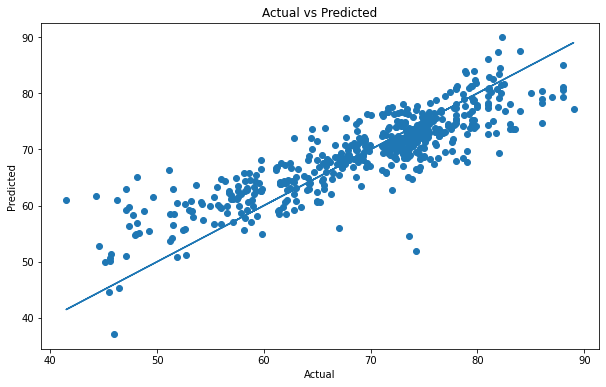

In [23]:
 # train the model
en = ElasticNet()
en.fit(X_train, y_train)

#get predictions
in_sample_preds = en.predict(X_train)
out_sample_preds = en.predict(X_test)

#metric report
print("ElasticNet Regression")
print("In-Sample R2: ", r2_score(y_train, in_sample_preds))
print("Out-Sample R2: ", r2_score(y_test, out_sample_preds))
print()
print("In-Sample MSE: ", mean_squared_error(y_train, in_sample_preds))
print("Out-Sample MSE: ", mean_squared_error(y_test, out_sample_preds))
print()
print("In-Sample MAE: ", mean_absolute_error(y_train, in_sample_preds))
print("Out-Sample MAE: ", mean_absolute_error(y_test, out_sample_preds))

# predicted vs actual
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_sample_preds)
plt.plot(y_test, y_test)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

plt.show()

Decision Tree
In-Sample R2:  1.0
Out-Sample R2:  0.8974463359911415

In-Sample MSE:  0.0
Out-Sample MSE:  9.200019455252916

In-Sample MAE:  0.0
Out-Sample MAE:  1.8756809338521399


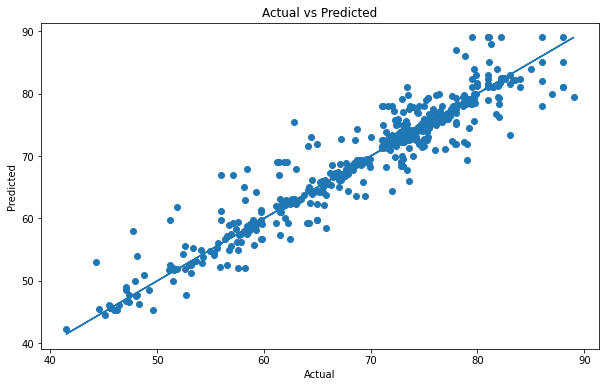

In [24]:
 # train the model
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

#get predictions
in_sample_preds = dt.predict(X_train)
out_sample_preds = dt.predict(X_test)

#metric report
print("Decision Tree")
print("In-Sample R2: ", r2_score(y_train, in_sample_preds))
print("Out-Sample R2: ", r2_score(y_test, out_sample_preds))
print()
print("In-Sample MSE: ", mean_squared_error(y_train, in_sample_preds))
print("Out-Sample MSE: ", mean_squared_error(y_test, out_sample_preds))
print()
print("In-Sample MAE: ", mean_absolute_error(y_train, in_sample_preds))
print("Out-Sample MAE: ", mean_absolute_error(y_test, out_sample_preds))

# predicted vs actual
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_sample_preds)
plt.plot(y_test, y_test)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

plt.show()

AdaBoost Regressor
In-Sample R2:  0.8500957838214744
Out-Sample R2:  0.8452714124748781

In-Sample MSE:  13.156612433673859
Out-Sample MSE:  13.880596361646957

In-Sample MAE:  2.9381537224619505
Out-Sample MAE:  2.9726346317598846


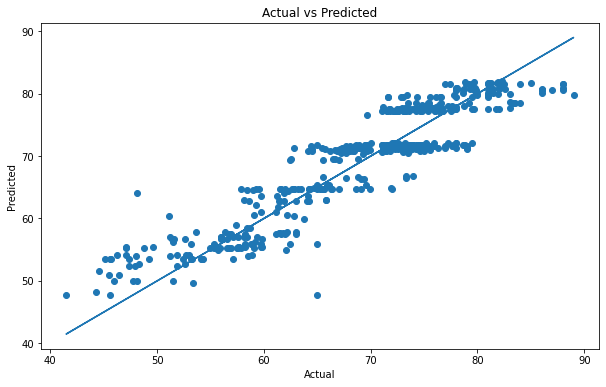

In [25]:
# train the model
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)

#get predictions
in_sample_preds = ada.predict(X_train)
out_sample_preds = ada.predict(X_test)

#metric report
print("AdaBoost Regressor")
print("In-Sample R2: ", r2_score(y_train, in_sample_preds))
print("Out-Sample R2: ", r2_score(y_test, out_sample_preds))
print()
print("In-Sample MSE: ", mean_squared_error(y_train, in_sample_preds))
print("Out-Sample MSE: ", mean_squared_error(y_test, out_sample_preds))
print()
print("In-Sample MAE: ", mean_absolute_error(y_train, in_sample_preds))
print("Out-Sample MAE: ", mean_absolute_error(y_test, out_sample_preds))

# predicted vs actual
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_sample_preds)
plt.plot(y_test, y_test)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

plt.show()

GradientBoost Regressor
In-Sample R2:  0.9158418636530434
Out-Sample R2:  0.8936890513063149

In-Sample MSE:  7.386289800805517
Out-Sample MSE:  9.537082909137341

In-Sample MAE:  2.0020797302995885
Out-Sample MAE:  2.3519146030409788


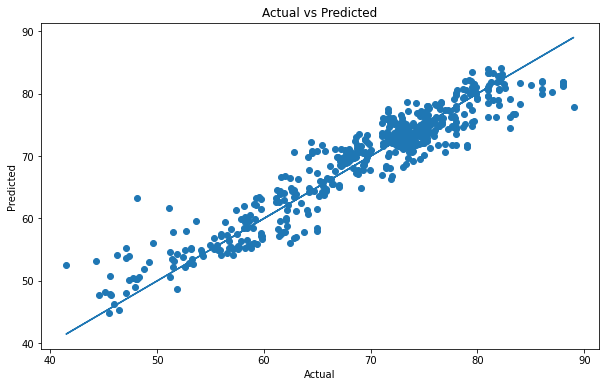

In [26]:
 # train the model
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

#get predictions
in_sample_preds = gb.predict(X_train)
out_sample_preds = gb.predict(X_test)

#metric report
print("GradientBoost Regressor")
print("In-Sample R2: ", r2_score(y_train, in_sample_preds))
print("Out-Sample R2: ", r2_score(y_test, out_sample_preds))
print()
print("In-Sample MSE: ", mean_squared_error(y_train, in_sample_preds))
print("Out-Sample MSE: ", mean_squared_error(y_test, out_sample_preds))
print()
print("In-Sample MAE: ", mean_absolute_error(y_train, in_sample_preds))
print("Out-Sample MAE: ", mean_absolute_error(y_test, out_sample_preds))

# predicted vs actual
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_sample_preds)
plt.plot(y_test, y_test)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

plt.show()

eXtreme GradientBoost Regressor
In-Sample R2:  0.9956948005768151
Out-Sample R2:  0.9230928190386881

In-Sample MSE:  0.37785355011671234
Out-Sample MSE:  6.899290902289062

In-Sample MAE:  0.42172920542621845
Out-Sample MAE:  1.8691239382970193


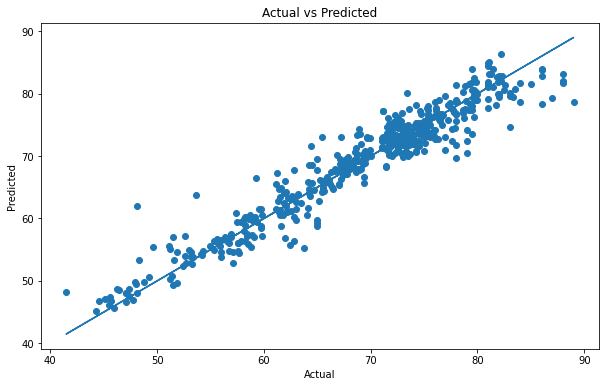

In [27]:
# train the model
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

#get predictions
in_sample_preds = xgb.predict(X_train)
out_sample_preds = xgb.predict(X_test)

#metric report
print("eXtreme GradientBoost Regressor")
print("In-Sample R2: ", r2_score(y_train, in_sample_preds))
print("Out-Sample R2: ", r2_score(y_test, out_sample_preds))
print()
print("In-Sample MSE: ", mean_squared_error(y_train, in_sample_preds))
print("Out-Sample MSE: ", mean_squared_error(y_test, out_sample_preds))
print()
print("In-Sample MAE: ", mean_absolute_error(y_train, in_sample_preds))
print("Out-Sample MAE: ", mean_absolute_error(y_test, out_sample_preds))

# predicted vs actual
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_sample_preds)
plt.plot(y_test, y_test)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

plt.show()

KNN Regressor
In-Sample R2:  0.6887642012756257
Out-Sample R2:  0.49663251381607265

In-Sample MSE:  27.316168175182483
Out-Sample MSE:  45.15675486381323

In-Sample MAE:  3.7287591240875915
Out-Sample MAE:  4.896108949416342


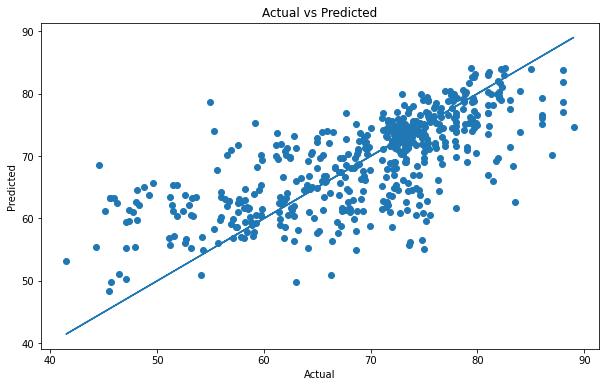

In [28]:
# train the model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

#get predictions
in_sample_preds = knn.predict(X_train)
out_sample_preds = knn.predict(X_test)

#metric report
print("KNN Regressor")
print("In-Sample R2: ", r2_score(y_train, in_sample_preds))
print("Out-Sample R2: ", r2_score(y_test, out_sample_preds))
print()
print("In-Sample MSE: ", mean_squared_error(y_train, in_sample_preds))
print("Out-Sample MSE: ", mean_squared_error(y_test, out_sample_preds))
print()
print("In-Sample MAE: ", mean_absolute_error(y_train, in_sample_preds))
print("Out-Sample MAE: ", mean_absolute_error(y_test, out_sample_preds))

# predicted vs actual
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_sample_preds)
plt.plot(y_test, y_test)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

plt.show()

SVM Regressor
In-Sample R2:  0.20027400808664408
Out-Sample R2:  0.20236462494808072

In-Sample MSE:  70.1893862425378
Out-Sample MSE:  71.55532705337322

In-Sample MAE:  6.072608970823603
Out-Sample MAE:  6.14616254245179


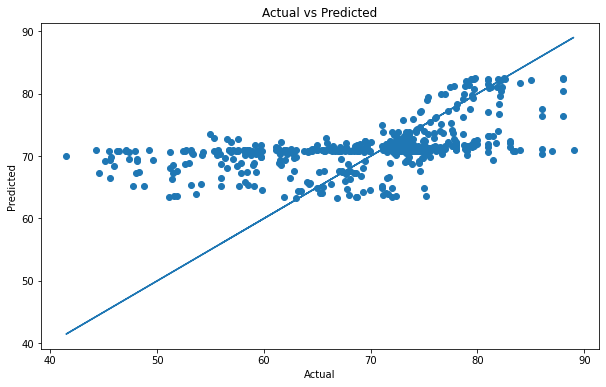

In [29]:
# train the model
svm = SVR()
svm.fit(X_train, y_train)

#get predictions
in_sample_preds = svm.predict(X_train)
out_sample_preds = svm.predict(X_test)

#metric report
print("SVM Regressor")
print("In-Sample R2: ", r2_score(y_train, in_sample_preds))
print("Out-Sample R2: ", r2_score(y_test, out_sample_preds))
print()
print("In-Sample MSE: ", mean_squared_error(y_train, in_sample_preds))
print("Out-Sample MSE: ", mean_squared_error(y_test, out_sample_preds))
print()
print("In-Sample MAE: ", mean_absolute_error(y_train, in_sample_preds))
print("Out-Sample MAE: ", mean_absolute_error(y_test, out_sample_preds))

# predicted vs actual
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_sample_preds)
plt.plot(y_test, y_test)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

plt.show()

# Model Selection

Random Forest
In-Sample R2:  0.9911828973365668

In-Sample MSE:  0.7773029746983253

In-Sample MAE:  0.5815943947061112


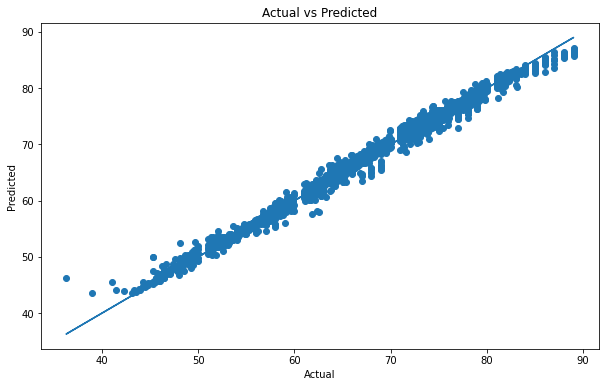

In [30]:
# train the model
rf = RandomForestRegressor()
rf.fit(X, y)

#get predictions
in_sample_preds = rf.predict(X)

#metric report
print("Random Forest")
print("In-Sample R2: ", r2_score(y, in_sample_preds))
print()
print("In-Sample MSE: ", mean_squared_error(y, in_sample_preds))
print()
print("In-Sample MAE: ", mean_absolute_error(y, in_sample_preds))

# predicted vs actual
plt.figure(figsize=(10,6))
plt.scatter(y, in_sample_preds)
plt.plot(y, y)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

plt.show()

In [31]:
pd.DataFrame(list(zip(features.columns, rf.feature_importances_))).sort_values(by=1, ascending=False).head(10)

,0,1
4,HIV/AIDS,0.617615
6,incomeGroup_High income,0.124005
5,Schooling,0.101292
3,BMI,0.066550
0,Alcohol,0.033164
1,percentageexpenditure,0.026800
2,Measles,0.017272
9,incomeGroup_Upper middle income,0.009330
7,incomeGroup_Low income,0.002699
8,incomeGroup_Lower middle income,0.001273


In [32]:
import pickle

In [33]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(rf, open(filename, 'wb'))